In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/인사교/DL

/content/drive/MyDrive/인사교/DL


In [3]:
# 데이터 경로 지정
train_dir = './data/dogs_vs_cats_small/train'
validation_dir = './data/dogs_vs_cats_small/validation'
test_dir = 'data/dogs_vs_cats_small/test'

In [4]:
# 이미지 정규화, 라벨링, 입력값 크기도 동일하게 맞추어야 함(150, 150)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# 픽셀값의 범위를 조정하는 기능 생성
generator = ImageDataGenerator(rescale = 1./255) # -> 0 ~ 1 사이의 값으로 스케일링

In [6]:
train_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치단위로 데이터를 생성
    directory = train_dir, # 경로지정
    target_size = (150, 150), # 이미지 크기 조정
    class_mode = 'binary', # 이진 분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
    )

val_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치단위로 데이터를 생성
    directory = validation_dir, # 경로지정
    target_size = (150, 150), # 이미지 크기 조정
    class_mode = 'binary', # 이진 분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
    )

test_generator = generator.flow_from_directory( # 지정된 디렉토리에서 이미지를 불러오고, 배치단위로 데이터를 생성
    directory = test_dir, # 경로지정
    target_size = (150, 150), # 이미지 크기 조정
    class_mode = 'binary', # 이진 분류 // categorical(다중분류)
    batch_size = 50 # 배치 단위 지정(한번에 변환할 이미지 개수)
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [7]:
train_generator.class_indices # 라벨링 확인
# 디렉토리별로 라벨링을 진행하는데, 기본값이 오름차순

{'cats': 0, 'dogs': 1}

In [8]:
# CNN 모델 -> 특징추출부 + 분류부(Conv, Pool) + 분류뷰(Dense)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Dropout

# Input : InputLayer 보다는 좀 더 상위 수준의 API
# Conv2D : 2차원의 컨볼루션 층, MaxPool2D : 2차원 맥스풀링층

In [ ]:
# 뼈대
model = Sequential()

# 입력층
model.add(Input(shape = (150, 150, 3))) # 150 * 150 3개의 색상 채널

##### 특징 추출부 시작 #####
model.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), #   커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    # 이미지 자체가 크거나, 특징이 많을 때 -> vaild
    # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있다가 판단 되는 경우 -> smae
    activation = 'relu',
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
    ))
model.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최대값 => 가장 도드라지는 픽셀 1개, 크기는 보통 2 * 2
))
model.add(Conv2D(
    filters = 16, # 정답은 없음
    kernel_size = (3, 3),
    padding = 'same',
    activation = 'relu'
    ))
model.add(MaxPool2D(
    pool_size = (2, 2)
))
##### 특징 추출부 끝 #####

model.add(Flatten()) # 다차원을 1차원으로 변환

##### 분류부 시작 #####
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))

# 출력층
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 딥러닝 설계 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,985 (1.30 MB)

 Trainable params: 339,985 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습 방법 설정
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
# 학습
model_history = model.fit(
                          train_generator,
                          epochs = 20,
                          validation_data = val_generator
                          )

# accuracy: 0.9820 - loss: 0.0714 - val_accuracy: 0.6740 - val_loss: 1.4041 -> 과대적합
# 모델 설계를 최소화 하였기 때문
# 기본적으로는 Conv/Pool 층이 4~5 set은 기본적으로 구성 됨, filters도 100개 이상의 옵션으로 구성

# 데이터 수를 증가시킴, 모델 깊이를 증가시킴, 설계를 변경, 데이터 증강(변형)
# 규제, dropout, 조기 학습 중단

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 426s 10s/step - accuracy: 0.5224 - loss: 0.6900 - val_accuracy: 0.5380 - val_loss: 0.6707
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.5600 - loss: 0.6724 - val_accuracy: 0.5950 - val_loss: 0.6635
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.6976 - loss: 0.5842 - val_accuracy: 0.6660 - val_loss: 0.6170
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 333ms/step - accuracy: 0.7490 - loss: 0.5100 - val_accuracy: 0.6660 - val_loss: 0.5978
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.7703 - loss: 0.4890 - val_accuracy: 0.7020 - val_loss: 0.6059
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.8237 - loss: 0.4010 - val_accuracy: 0.6890 - val_loss: 0.6232
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.8415 - loss: 0.3698 - val_accuracy: 0.6890 - val_loss: 0.6188
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.8595 - loss: 0.3419 - val_accuracy: 0.6820

In [9]:
# 예측해보기
import cv2
path = './data/dogs_vs_cats_small/validation/dogs/dog.1007.jpg'
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변경
img = img.astype(float) / 255 # 0 ~ 1 사이의 값으로 스케일링
img = cv2.resize(img, (150, 150)) # 150 * 150으로 크기 조정
img = img.reshape(1, 150, 150, 3) # 차원 맞춰주기

In [10]:
model.predict(img) # 0.5보다 큰 경우 1 -> 1 이 dog

NameError: name 'model' is not defined

### Dropout
- **학습** 하는 동안에만 적용
- 신경망의 가중치 비율을 일정 부분 활성화(결과값에 영향을 주지 않도록)되지 않도록 꺼버림

In [ ]:
# 뼈대
model2 = Sequential()

# 입력층
model2.add(Input(shape = (150, 150, 3))) # 150 * 150 3개의 색상 채널

##### 특징 추출부 시작 #####
model2.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), #   커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    # 이미지 자체가 크거나, 특징이 많을 때 -> vaild
    # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있다가 판단 되는 경우 -> smae
    activation = 'relu',
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
    ))
# Conv2D 이후에 Dropout 적용 가능은 하나, 성능이 많이 떨어짐
model2.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최대값 => 가장 도드라지는 픽셀 1개, 크기는 보통 2 * 2
))

model2.add(Dropout(0.3)) # Dropout 활용, 30%를  무작위로 0으로 만든 후 다음 층으로 넘기겠다!

model2.add(Conv2D(
    filters = 16, # 정답은 없음
    kernel_size = (3, 3),
    padding = 'same',
    activation = 'relu'
    ))
model2.add(MaxPool2D(
    pool_size = (2, 2)
))
##### 특징 추출부 끝 #####

model2.add(Flatten()) # 다차원을 1차원으로 변환

##### 분류부 시작 #####
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 16, activation = 'relu'))

# 출력층
model2.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 학습 방법 설정
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
# 학습
model_history = model2.fit(
                          train_generator,
                          epochs = 20,
                          validation_data = val_generator
                          )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 970s 21s/step - accuracy: 0.4828 - loss: 0.6993 - val_accuracy: 0.5010 - val_loss: 0.6928
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.5077 - loss: 0.6923 - val_accuracy: 0.5240 - val_loss: 0.6922
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.5294 - loss: 0.6898 - val_accuracy: 0.6060 - val_loss: 0.6847
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.5496 - loss: 0.6858 - val_accuracy: 0.6320 - val_loss: 0.6734
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.5890 - loss: 0.6683 - val_accuracy: 0.6230 - val_loss: 0.6637
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.6309 - loss: 0.6430 - val_accuracy: 0.6400 - val_loss: 0.6332
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.6746 - loss: 0.6133 - val_accuracy: 0.6850 - val_loss: 0.6057
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.6986 - loss: 0.5725 - val_accuracy: 0.6940

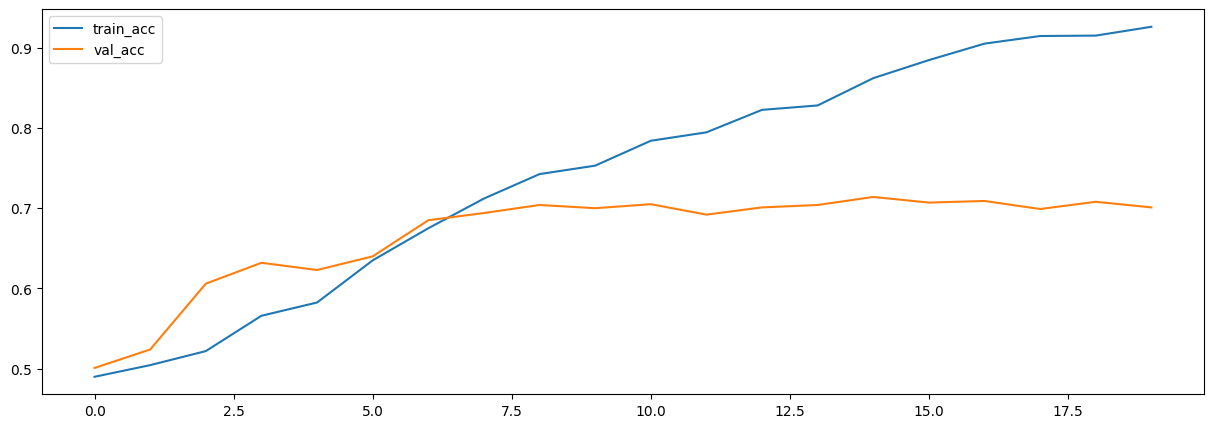

In [ ]:
# 첫번째 모델(드롭아옷 적용 시키기 전) : accuracy: 0.9820 - loss: 0.0714 - val_accuracy: 0.6740 - val_loss: 1.4041
# 두번째 모델(드롭아웃 적용 시킨 이후) : accuracy: 0.9273 - loss: 0.1859 - val_accuracy: 0.7010 - val_loss: 0.8737

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(model_history.history['accuracy'], label = 'train_acc')
plt.plot(model_history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

#### 데이터 증강
- 드롭아웃만으로는 과대적합을 피하지는 못 했음
- 데이터 증강 : 이미지 변형(회전, 이동, 확대, 축소 등)을 통해 데이터를 변형시키는 방법
  - 학습할 때만 적용!!
  - 과대적합이 일어나는 원인 중에 하나가 train set이 부족하거나 편향적일 때 발생
  - train set을 다양하게 변형해서, 마치 새로운 train 데이터처럼 사용하는 기법
  - 훈련데이터 수가 늘어난 효과(실제로는 아님)

In [11]:
# 데이터 증강 기법 적용
aug_generator = ImageDataGenerator(
    rescale = 1. / 255, # 0 ~ 1 사이의 픽셀 값 조정(스케일링)
    rotation_range = 20, # -20 ~ 20도 사이에서 무작위로 회전
    width_shift_range = 0.1, # 10% 전체 너비의 10%만큼 좌우로 무작위로 이동
    height_shift_range = 0.1, # 10% 전체 높이의 10% 만큼 상하로 무작위로 이동
    shear_range = 0.1, # 시계반대방향으로 지정된 각도(0.1)만큼 변형
    zoom_range = 0.1, # 0.9 ~ 1.1배 사이로 무작위로 확대하거나 축소
    horizontal_flip = True, # 수평방향으로 뒤집을지 여부
    fill_mode = 'nearest' # 빈 공간을 가까운 값으로 채우겠다!
)

In [12]:
train_aug_generator = aug_generator.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 25
)

Found 2000 images belonging to 2 classes.


In [ ]:
# 뼈대
model3 = Sequential()

# 입력층
model3.add(Input(shape = (150, 150, 3))) # 150 * 150 3개의 색상 채널

##### 특징 추출부 시작 #####
model3.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), #   커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    # 이미지 자체가 크거나, 특징이 많을 때 -> vaild
    # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있다가 판단 되는 경우 -> smae
    activation = 'relu',
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
    ))
# Conv2D 이후에 Dropout 적용 가능은 하나, 성능이 많이 떨어짐
model3.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최대값 => 가장 도드라지는 픽셀 1개, 크기는 보통 2 * 2
))

model3.add(Dropout(0.3)) # Dropout 활용, 30%를  무작위로 0으로 만든 후 다음 층으로 넘기겠다!

model3.add(Conv2D(
    filters = 16, # 정답은 없음
    kernel_size = (3, 3),
    padding = 'same',
    activation = 'relu'
    ))
model3.add(MaxPool2D(
    pool_size = (2, 2)
))
##### 특징 추출부 끝 #####

model3.add(Flatten()) # 다차원을 1차원으로 변환

##### 분류부 시작 #####
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units = 32, activation = 'relu'))
model3.add(Dense(units = 16, activation = 'relu'))

# 출력층
model3.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 학습 방법 설정
model3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
# 학습
model_history2 = model3.fit(
                          train_aug_generator,
                          epochs = 40,
                          validation_data = val_generator
                          )

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 265ms/step - accuracy: 0.5086 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 274ms/step - accuracy: 0.4872 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 265ms/step - accuracy: 0.4946 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.4990 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.5012 - loss: 0.6933 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.5272 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6911
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 264ms/step - accuracy: 0.5380 - loss: 0.6920 - val_accuracy: 0.5160 - val_loss: 0.6923
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.5297 - loss: 0.6920 - val_accuracy: 0.570

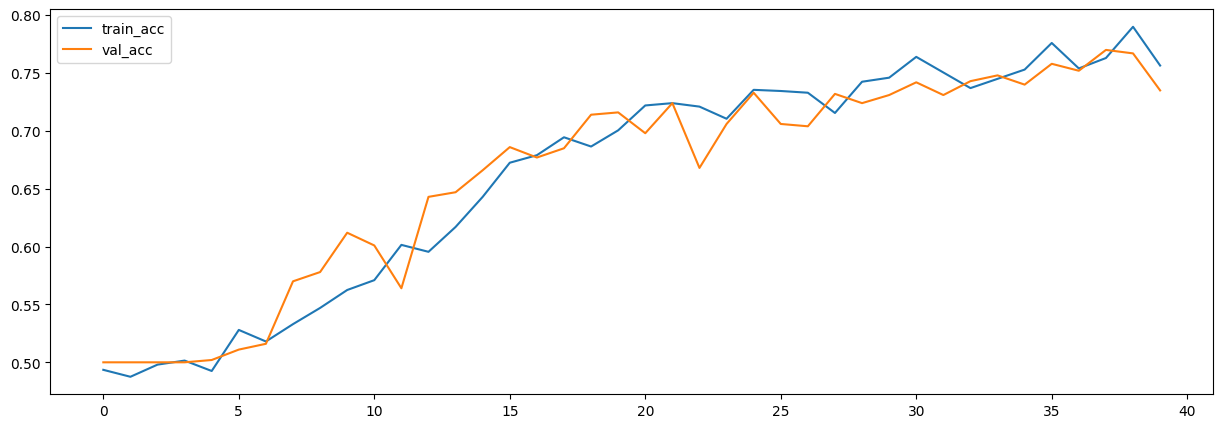

In [ ]:
# 첫번째 모델(드롭아옷 적용 시키기 전) : accuracy: 0.9820 - loss: 0.0714 - val_accuracy: 0.6740 - val_loss: 1.4041
# 두번째 모델(드롭아웃 적용 시킨 이후) : accuracy: 0.9273 - loss: 0.1859 - val_accuracy: 0.7010 - val_loss: 0.8737
# 세번째 모델(드롭아웃 +  데이터 증강) : accuracy: 0.7533 - loss: 0.4769 - val_accuracy: 0.7350 - val_loss: 0.5022

plt.figure(figsize = (15, 5))
plt.plot(model_history2.history['accuracy'], label = 'train_acc')
plt.plot(model_history2.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

#### 배치 정규화(BatchNormalization)
- Conv 층에서 파라미터 값(커널의 요소)들이 너무 큰 숫자값이라면, 학습에 있어서 의존성이 높아지기 때문에 성능이 저하되는 현상이 있을 수 있음
  - 정규화(평균이 0이고, 분산이 1이 되도록)를 수행
  - 일반적으로 숫자 값의 범위들이 작아지면 학습이 안정되고, 속도도 빠름!
  - relu를 사용할 경우 음수가 발생 -> 음수의 경우 다음 층으로 정보가 전달되지 않음 -> reaky relu 활용
---
- 확실하게 성능이 향상됨!!
- 되게 좋은데, '왜' 좋아지는지는 수학적으로 규명이 안 됨!

In [13]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2 # 규제

# 뼈대
model4 = Sequential()

# 입력층
model4.add(Input(shape = (150, 150, 3))) # 150 * 150 3개의 색상 채널

##### 특징 추출부 시작 #####
model4.add(Conv2D(
    filters = 32, # 찾을 특징의 개수
    kernel_size = (3, 3), #   커널(필터)의 크기
    padding = 'same', # 이미지 크기를 동일하게 하기 위해서, 가장 자리에 0을 채워둠
    strides = (2, 2) # 보폭, 양 옆으로 2픽셀씩 + 위 아래로 2픽셀씩
    ))

# conv -> batch -> activation -> pool
model4.add(BatchNormalization()) # 배치 정규화, conv, pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
# alpha = 0.01 : 음수입력에 대한 기울기를 설정하는 값 -> 음수인 경우 1%의 값만 사용

# Conv2D 이후에 Dropout 적용 가능은 하나, 성능이 많이 떨어짐
model4.add(MaxPool2D(
    pool_size = (2, 2) # 풀링 윈도우 설정(최대값을 뽑기 위한 영역 크기)
    # 최대값 => 가장 도드라지는 픽셀 1개, 크기는 보통 2 * 2
))

model4.add(Dropout(0.3)) # Dropout 활용, 30%를  무작위로 0으로 만든 후 다음 층으로 넘기겠다!

model4.add(Conv2D(
    filters = 16, # 정답은 없음
    kernel_size = (3, 3),
    padding = 'same'
    ))

model4.add(BatchNormalization()) # 배치 정규화, conv, pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수

model4.add(MaxPool2D(
    pool_size = (2, 2)
))
##### 특징 추출부 끝 #####

model4.add(Flatten()) # 다차원을 1차원으로 변환

##### 분류부 시작 #####
model4.add(Dense(units = 64, kernel_regularizer = l2(0.01))) # 규제도 적용! (값이 높으면 높을 수록, 가하는 규제 강도가 쎄지게 됨!!)
# Dense층에도 추가 가능! -> 더 빠른 연산속도를 위함
model4.add(BatchNormalization()) # 배치 정규화, conv, pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
model4.add(Dropout(0.3))
model4.add(Dense(units = 32))
model4.add(BatchNormalization()) # 배치 정규화, conv, pool 사이!!
model4.add(LeakyReLU(alpha = 0.01)) # 활성화 함수
model4.add(Dense(units = 16, activation = 'relu'))

# 출력층
model4.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam
# 학습 방법 설정
model4.compile(
    optimizer = Adam(learning_rate = 0.002),
    # 학습률을 더 크게 조정 -> 배치정규화 수행 시 학습률을 좀 더 높게 설정하면 좀 더 효율적으로 학습을 수행할 수 있음!
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
model_history3 = model4.fit(
                          train_aug_generator,
                          epochs = 40,
                          validation_data = val_generator
                          )

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 362ms/step - accuracy: 0.6027 - loss: 0.9965 - val_accuracy: 0.5000 - val_loss: 1.3476
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.6094 - loss: 0.9521 - val_accuracy: 0.5960 - val_loss: 0.9298
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 291ms/step - accuracy: 0.6227 - loss: 0.8894 - val_accuracy: 0.5880 - val_loss: 1.0047
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - accuracy: 0.6418 - loss: 0.9424 - val_accuracy: 0.5810 - val_loss: 0.9408
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.6746 - loss: 0.9004 - val_accuracy: 0.5760 - val_loss: 1.0224
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.6307 - loss: 0.9680 - val_accuracy: 0.6010 - val_loss: 1.0631
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - accuracy: 0.6651 - loss: 0.9225 - val_accuracy: 0.6390 - val_loss: 0.9199
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - accuracy: 0.6572 - loss: 0.8831 - val_accu

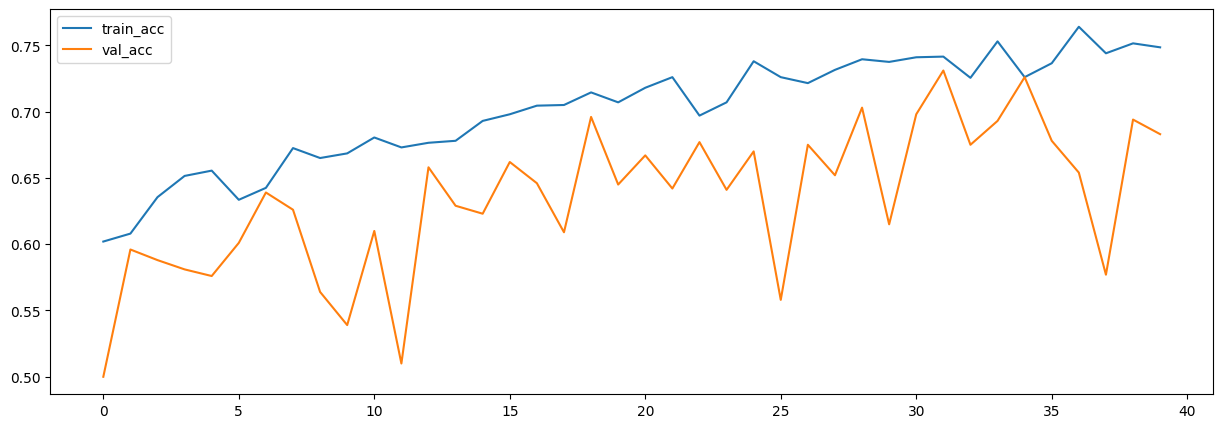

In [ ]:
# 첫번째 모델(드롭아옷 적용 시키기 전) : accuracy: 0.9820 - loss: 0.0714 - val_accuracy: 0.6740 - val_loss: 1.4041
# 두번째 모델(드롭아웃 적용 시킨 이후) : accuracy: 0.9273 - loss: 0.1859 - val_accuracy: 0.7010 - val_loss: 0.8737
# 세번째 모델(드롭아웃 +  데이터 증강) : accuracy: 0.7533 - loss: 0.4769 - val_accuracy: 0.7350 - val_loss: 0.5022

plt.figure(figsize = (15, 5))
plt.plot(model_history3.history['accuracy'], label = 'train_acc')
plt.plot(model_history3.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

### 전이학습(Transfer Learning) : 기존에 잘 만들어진 모델 가져와 학습
- 사전 학습 모델을 가져와서, 새로운 데이터로 일부 계층을 새로 학습하는 방법
- Fine tunning(미세조정) : 일부 계증(또는 전체 모델)을 추가로 미세하게 학습

In [14]:
from tensorflow.keras.applications import VGG16 # 사전 학습 모델

In [15]:
conv_base = VGG16(
    weights = 'imagenet', # imagenet에서 학습되어있는 가중치를 가져옴
    include_top = False, # 분류부 사용 여부 -> False : 특징추출부만 사용!
    input_shape = (150, 150, 3) # 이미지 크기 조정
)

In [16]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
conv_base.trainable = False # 전체 층에 대해서 동결

In [18]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
# 사전 학습 된 모델 가지고 설계!!

# 뼈대
transfer_model = Sequential()

# 입력층
transfer_model.add(conv_base) # VGG16 모델의 특징 추출부로 세팅(학습이 수행되지 않게끔 동결된 상태)

transfer_model.add(Flatten()) # 다차원을 1차원으로 변환

##### 분류부 시작 #####
transfer_model.add(Dense(units = 64, activation = 'relu'))
transfer_model.add(Dense(units = 32, activation = 'relu'))
transfer_model.add(Dense(units = 12, activation = 'relu'))

# 출력층
transfer_model.add(Dense(units = 1, activation = 'sigmoid'))

In [20]:
transfer_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
transfer_model_his = transfer_model.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = val_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 950s 12s/step - accuracy: 0.7656 - loss: 0.4813 - val_accuracy: 0.8750 - val_loss: 0.2982
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 879s 11s/step - accuracy: 0.8676 - loss: 0.2852 - val_accuracy: 0.8960 - val_loss: 0.2582
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 955s 11s/step - accuracy: 0.9002 - loss: 0.2423 - val_accuracy: 0.8970 - val_loss: 0.2467
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 887s 11s/step - accuracy: 0.9022 - loss: 0.2414 - val_accuracy: 0.8940 - val_loss: 0.2484
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 881s 11s/step - accuracy: 0.9090 - loss: 0.2359 - val_accuracy: 0.9050 - val_loss: 0.2428
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 878s 11s/step - accuracy: 0.9092 - loss: 0.2238 - val_accuracy: 0.8960 - val_loss: 0.2451
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 874s 11s/step - accuracy: 0.9115 - loss: 0.2080 - val_accuracy: 0.8960 - val_loss: 0.2523
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9082 - loss: 0.2134

### 전이학습, 미세조정
- 미세조정 : 전이학습 후에, 전체 모델 또는 일부 계층을 추가로 학습

1. 사전학습 된 특성 추출부하단에 분류부를 추가
2. 사전학습 된 특성추출부 Freze(잘 학습된 파라미터 값들이 손실되지 않게끔)
3. 새로운 분류부 학습
---
4. 사전 학습 된 특성 추출부 중 학습시킬 일부 계층의 고정을 Freeze 풀기
5. 고정을 푼 상태에서 **작은 학습률**로 Training

In [ ]:
# 각 층의 이름 접근
conv_base.layers[0].name

In [ ]:
# 미세조정 적용
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

In [ ]:
conv_base.layers[-2].trainable = True

In [ ]:
conv_base.summary()

In [ ]:
# 전체 동결 해제 -> 전체 동결되어 있는 경우, 개별 요소 동결이 수행되지 않음!!
conv_base.trainable = True

In [ ]:
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
trasfer_model2 = Sequential()

trasfer_model2.add(conv_base) # 마지막 층의 동결이 해제된 상황

trasfer_model2.add(Flatten()) # 다차원을 1차원으로 변환

trasfer_model2.add(Dense(64, activation = 'relu'))
trasfer_model2.add(Dense(32, activation = 'relu'))
trasfer_model2.add(Dense(16, activation = 'relu'))

trasfer_model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
import tensorflow.keras.optimizers as Adam

transfer_model2.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'binary_crossentropy', # 이진 분류
    metrics = ['accuracy']
)

In [ ]:
transfer_model2_his = transfer_model2.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = val_generator
)